In [1]:
import pandas as pd
from tabulate import tabulate
import numpy as np
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def createdf(number):
    nombres_columnas = ['unit', 'cycle', 'op_setting_1', 'op_setting_2', 'op_setting_3']
    nombres_columnas += [f'sensor_{i}' for i in range(1, 24)]
    df = pd.read_csv(rf"./CMAPSSData/train_FD00{number}.txt",sep = " ", header = None, index_col = None)
    df.columns = nombres_columnas
    df = df.iloc[:, :-2]
    return df

In [3]:
df = createdf(4)

In [4]:
df.head()

,unit,cycle,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,42.0049,0.8400,100.0,445.00,549.68,1343.43,1112.93,3.91,...,129.78,2387.99,8074.83,9.3335,0.02,330,2212,100.00,10.62,6.3670
1,1,2,20.0020,0.7002,100.0,491.19,606.07,1477.61,1237.50,9.35,...,312.59,2387.73,8046.13,9.1913,0.02,361,2324,100.00,24.37,14.6552
2,1,3,42.0038,0.8409,100.0,445.00,548.95,1343.12,1117.05,3.91,...,129.62,2387.97,8066.62,9.4007,0.02,329,2212,100.00,10.48,6.4213
3,1,4,42.0000,0.8400,100.0,445.00,548.70,1341.24,1118.03,3.91,...,129.80,2388.02,8076.05,9.3369,0.02,328,2212,100.00,10.54,6.4176
4,1,5,25.0063,0.6207,60.0,462.54,536.10,1255.23,1033.59,7.05,...,164.11,2028.08,7865.80,10.8366,0.02,305,1915,84.93,14.03,8.6754


In [5]:
max_cycle_by_unit = df.groupby('unit')['cycle'].transform('max')
df['RUL'] = max_cycle_by_unit - df['cycle']

In [6]:
df.head()

,unit,cycle,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,RUL
0,1,1,42.0049,0.8400,100.0,445.00,549.68,1343.43,1112.93,3.91,...,2387.99,8074.83,9.3335,0.02,330,2212,100.00,10.62,6.3670,320
1,1,2,20.0020,0.7002,100.0,491.19,606.07,1477.61,1237.50,9.35,...,2387.73,8046.13,9.1913,0.02,361,2324,100.00,24.37,14.6552,319
2,1,3,42.0038,0.8409,100.0,445.00,548.95,1343.12,1117.05,3.91,...,2387.97,8066.62,9.4007,0.02,329,2212,100.00,10.48,6.4213,318
3,1,4,42.0000,0.8400,100.0,445.00,548.70,1341.24,1118.03,3.91,...,2388.02,8076.05,9.3369,0.02,328,2212,100.00,10.54,6.4176,317
4,1,5,25.0063,0.6207,60.0,462.54,536.10,1255.23,1033.59,7.05,...,2028.08,7865.80,10.8366,0.02,305,1915,84.93,14.03,8.6754,316


In [7]:
X_total = df.drop(['unit', 'cycle', 'RUL'], axis = 1)
y = df.RUL

In [8]:
X_total.head()

,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,42.0049,0.8400,100.0,445.00,549.68,1343.43,1112.93,3.91,5.70,137.36,...,129.78,2387.99,8074.83,9.3335,0.02,330,2212,100.00,10.62,6.3670
1,20.0020,0.7002,100.0,491.19,606.07,1477.61,1237.50,9.35,13.61,332.10,...,312.59,2387.73,8046.13,9.1913,0.02,361,2324,100.00,24.37,14.6552
2,42.0038,0.8409,100.0,445.00,548.95,1343.12,1117.05,3.91,5.69,138.18,...,129.62,2387.97,8066.62,9.4007,0.02,329,2212,100.00,10.48,6.4213
3,42.0000,0.8400,100.0,445.00,548.70,1341.24,1118.03,3.91,5.70,137.98,...,129.80,2388.02,8076.05,9.3369,0.02,328,2212,100.00,10.54,6.4176
4,25.0063,0.6207,60.0,462.54,536.10,1255.23,1033.59,7.05,9.00,174.82,...,164.11,2028.08,7865.80,10.8366,0.02,305,1915,84.93,14.03,8.6754


In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_total)
joblib.dump(scaler, 'scaler.pkl')
X_scaled = pd.DataFrame(X_scaled,columns=X_total.columns)
X_scaled.head()

,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1.218156,0.864668,0.418783,-1.054690,-0.796416,-0.701412,-0.745729,-1.137677,-1.081831,-0.993802,...,-0.989007,0.417814,0.081921,0.063831,-0.694278,-0.638665,-0.114203,0.418783,-1.030999,-1.031756
1,-0.270478,0.414718,0.418783,0.692508,0.713666,0.562449,0.298212,0.363906,0.371152,0.332051,...,0.331131,0.415786,-0.253086,-0.125677,-0.694278,0.476120,0.655708,0.418783,0.352814,0.358264
2,1.218082,0.867565,0.418783,-1.054690,-0.815965,-0.704332,-0.711202,-1.137677,-1.083668,-0.988219,...,-0.990162,0.417658,-0.013912,0.153387,-0.694278,-0.674626,-0.114203,0.418783,-1.045089,-1.022649
3,1.217824,0.864668,0.418783,-1.054690,-0.822660,-0.722040,-0.702990,-1.137677,-1.081831,-0.989581,...,-0.988862,0.418048,0.096162,0.068362,-0.694278,-0.710586,-0.114203,0.418783,-1.039051,-1.023269
4,0.068094,0.158844,-2.387873,-0.391216,-1.160079,-1.532181,-1.410627,-0.270955,-0.475656,-0.738762,...,-0.741097,-2.389666,-2.358027,2.066982,-0.694278,-1.537685,-2.155843,-2.387873,-0.687814,-0.644612


In [10]:
F_scores, p_values = f_regression(X_scaled, y)

feature_scores = pd.DataFrame({
    'Feature': X_total.columns,
    'F_Score': F_scores,
    'p_value': p_values
}).sort_values(by='F_Score', ascending=False)

print(feature_scores)

         Feature     F_Score       p_value
16     sensor_14  376.128824  1.544847e-83
13     sensor_11  197.112930  1.045448e-44
18     sensor_16  177.819119  1.652659e-40
6       sensor_4  129.201577  6.565201e-30
19     sensor_17   66.525035  3.519606e-16
5       sensor_3   66.463396  3.631280e-16
11      sensor_9   37.471284  9.333000e-10
12     sensor_10    4.878018  2.720452e-02
4       sensor_2    1.209186  2.714978e-01
17     sensor_15    0.959047  3.274311e-01
22     sensor_20    0.484202  4.865278e-01
23     sensor_21    0.477028  4.897744e-01
20     sensor_18    0.468128  4.938522e-01
0   op_setting_1    0.347025  5.558045e-01
21     sensor_19    0.324954  5.686479e-01
2   op_setting_3    0.324954  5.686479e-01
1   op_setting_2    0.318258  5.726584e-01
10      sensor_8    0.266526  6.056735e-01
3       sensor_1    0.218645  6.400759e-01
7       sensor_5    0.172588  6.778236e-01
14     sensor_12    0.164594  6.849629e-01
15     sensor_13    0.137954  7.103244e-01
9       sen

In [11]:
f_regression(X_scaled, y)

(array([3.47024595e-01, 3.18258060e-01, 3.24953643e-01, 2.18645030e-01,
        1.20918556e+00, 6.64633957e+01, 1.29201577e+02, 1.72587754e-01,
        1.11488072e-01, 1.25036826e-01, 2.66526197e-01, 3.74712845e+01,
        4.87801827e+00, 1.97112930e+02, 1.64594230e-01, 1.37954389e-01,
        3.76128824e+02, 9.59046630e-01, 1.77819119e+02, 6.65250348e+01,
        4.68127992e-01, 3.24953643e-01, 4.84201926e-01, 4.77027623e-01]),
 array([5.55804459e-01, 5.72658438e-01, 5.68647876e-01, 6.40075946e-01,
        2.71497802e-01, 3.63128023e-16, 6.56520069e-30, 6.77823610e-01,
        7.38457449e-01, 7.23635794e-01, 6.05673470e-01, 9.33299977e-10,
        2.72045204e-02, 1.04544800e-44, 6.84962883e-01, 7.10324440e-01,
        1.54484705e-83, 3.27431064e-01, 1.65265865e-40, 3.51960644e-16,
        4.93852232e-01, 5.68647876e-01, 4.86527797e-01, 4.89774393e-01]))

In [12]:
test = pd.DataFrame(X_scaled)
test.describe()

,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
count,6.124900e+04,6.124900e+04,6.124900e+04,6.124900e+04,6.124900e+04,6.124900e+04,6.124900e+04,6.124900e+04,6.124900e+04,6.124900e+04,...,6.124900e+04,6.124900e+04,6.124900e+04,6.124900e+04,6.124900e+04,6.124900e+04,6.124900e+04,6.124900e+04,6.124900e+04,6.124900e+04
mean,8.468648e-17,-1.185031e-16,3.294072e-16,2.568436e-15,-2.809851e-15,-7.118449e-16,1.374937e-15,4.634554e-16,3.415881e-16,-9.805650e-17,...,2.023195e-16,-1.326851e-15,-2.864027e-15,7.636864e-16,7.760993e-17,1.450691e-16,5.964596e-16,1.025518e-15,3.134270e-16,1.880214e-16
std,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,...,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00
min,-1.623738e+00,-1.838897e+00,-2.387873e+00,-1.054690e+00,-1.176682e+00,-1.650485e+00,-1.487475e+00,-1.137677e+00,-1.087342e+00,-1.001904e+00,...,-9.996222e-01,-2.393644e+00,-2.591715e+00,-1.479147e+00,-6.942780e-01,-1.645567e+00,-2.155843e+00,-2.387873e+00,-1.077294e+00,-1.079167e+00
25%,-9.468643e-01,-1.032011e+00,4.187828e-01,-1.054690e+00,-8.057892e-01,-6.343475e-01,-6.907542e-01,-1.137677e+00,-1.078157e+00,-9.559476e-01,...,-9.547775e-01,4.171899e-01,-6.048584e-02,-8.497217e-01,-6.942780e-01,-6.386649e-01,-1.142032e-01,4.187828e-01,-9.987942e-01,-9.983643e-01
50%,6.776292e-02,4.140738e-01,4.187828e-01,-3.912163e-01,-6.341342e-01,-4.729975e-01,-5.446845e-01,-2.709546e-01,-4.701452e-01,-6.016424e-01,...,-6.014362e-01,4.183599e-01,1.867423e-01,-3.998520e-02,-6.942780e-01,-4.948217e-01,-3.858688e-02,4.187828e-01,-5.972368e-01,-5.968649e-01
75%,1.217696e+00,8.646679e-01,4.187828e-01,6.925079e-01,7.404448e-01,7.490426e-01,8.439411e-01,6.868568e-01,7.146515e-01,7.553929e-01,...,7.558193e-01,4.192180e-01,7.066452e-01,1.068762e-01,1.440345e+00,7.278456e-01,6.557081e-01,4.187828e-01,7.744990e-01,7.742372e-01
max,1.218366e+00,8.711050e-01,4.187828e-01,1.731975e+00,1.740650e+00,1.837708e+00,2.001688e+00,1.818565e+00,1.840668e+00,1.957267e+00,...,1.955216e+00,4.373152e-01,2.262619e+00,2.373099e+00,1.440345e+00,1.842630e+00,1.095657e+00,4.187828e-01,1.914761e+00,1.906234e+00


In [13]:
selector = SelectKBest(score_func=mutual_info_regression, k='all')  # 'all' para evaluar todas
selector.fit(X_scaled, y)
feature_scores = pd.DataFrame({
    'Feature': X_total.columns,
    'Score': selector.scores_
}).sort_values(by='Score', ascending=False)

print(feature_scores)

         Feature     Score
13     sensor_11  0.440817
6       sensor_4  0.396081
10      sensor_8  0.394475
15     sensor_13  0.308790
17     sensor_15  0.299139
14     sensor_12  0.297352
9       sensor_7  0.275559
11      sensor_9  0.240428
4       sensor_2  0.235923
19     sensor_17  0.228130
5       sensor_3  0.207866
16     sensor_14  0.181625
22     sensor_20  0.151820
23     sensor_21  0.149115
12     sensor_10  0.120312
8       sensor_6  0.065796
0   op_setting_1  0.008277
20     sensor_18  0.004902
18     sensor_16  0.004114
1   op_setting_2  0.003906
7       sensor_5  0.003657
3       sensor_1  0.002154
21     sensor_19  0.000000
2   op_setting_3  0.000000


In [14]:
X_total.columns

Index(['op_setting_1', 'op_setting_2', 'op_setting_3', 'sensor_1', 'sensor_2',
       'sensor_3', 'sensor_4', 'sensor_5', 'sensor_6', 'sensor_7', 'sensor_8',
       'sensor_9', 'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13',
       'sensor_14', 'sensor_15', 'sensor_16', 'sensor_17', 'sensor_18',
       'sensor_19', 'sensor_20', 'sensor_21'],
      dtype='object')

In [15]:
X_important = X_scaled[['sensor_14','sensor_11','sensor_16','sensor_4', 'sensor_17', 'sensor_3', 'sensor_9']]
X_important.head()

,sensor_14,sensor_11,sensor_16,sensor_4,sensor_17,sensor_3,sensor_9
0,0.081921,-0.365205,-0.694278,-0.745729,-0.638665,-0.701412,-0.633237
1,-0.253086,0.328498,-0.694278,0.298212,0.476120,0.562449,0.560738
2,-0.013912,-0.374454,-0.694278,-0.711202,-0.674626,-0.704332,-0.646979
3,0.096162,-0.368288,-0.694278,-0.702990,-0.710586,-0.722040,-0.630180
4,-2.358027,-1.971512,-0.694278,-1.410627,-1.537685,-1.532181,-1.572260


In [16]:
X_descartes = X_scaled[['op_setting_1', 'op_setting_2', 'op_setting_3', 'sensor_1',
                       'sensor_2', 'sensor_5', 'sensor_6', 'sensor_7', 'sensor_8',
                       'sensor_10', 'sensor_12', 'sensor_13', 'sensor_15', 'sensor_18',
                       'sensor_19', 'sensor_20', 'sensor_21']]
print(len(X_descartes.columns))
X_descartes.head()

17


,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_5,sensor_6,sensor_7,sensor_8,sensor_10,sensor_12,sensor_13,sensor_15,sensor_18,sensor_19,sensor_20,sensor_21
0,1.218156,0.864668,0.418783,-1.054690,-0.796416,-1.137677,-1.081831,-0.993802,-0.115765,-0.677047,-0.989007,0.417814,0.063831,-0.114203,0.418783,-1.030999,-1.031756
1,-0.270478,0.414718,0.418783,0.692508,0.713666,0.363906,0.371152,0.332051,0.653429,-0.207120,0.331131,0.415786,-0.125677,0.655708,0.418783,0.352814,0.358264
2,1.218082,0.867565,0.418783,-1.054690,-0.815965,-1.137677,-1.083668,-0.988219,-0.115352,-0.677047,-0.990162,0.417658,0.153387,-0.114203,0.418783,-1.045089,-1.022649
3,1.217824,0.864668,0.418783,-1.054690,-0.822660,-1.137677,-1.081831,-0.989581,-0.115627,-0.598726,-0.988862,0.418048,0.068362,-0.114203,0.418783,-1.039051,-1.023269
4,0.068094,0.158844,-2.387873,-0.391216,-1.160079,-0.270955,-0.475656,-0.738762,-2.156673,-1.303616,-0.741097,-2.389666,2.066982,-2.155843,-2.387873,-0.687814,-0.644612


In [17]:
def codo_plot(scaled_features, y, name = "1"):
    pca = PCA(svd_solver='auto')
    pca.fit(scaled_features, y = y)
    
    explained_variance_ratio = pca.explained_variance_ratio_
    
    plt.figure(figsize=(10, 6))
    plt.plot(np.arange(1, len(pca.explained_variance_ratio_) + 1), 
             pca.explained_variance_ratio_, 'o-', linewidth=2)
    
    plt.xlabel('Número de Componente', fontsize=12)
    plt.ylabel('Proporción de Varianza Explicada', fontsize=12)
    plt.grid(True)
    plt.savefig(f'IMGS/método del codo {name}.png')
    plt.show()


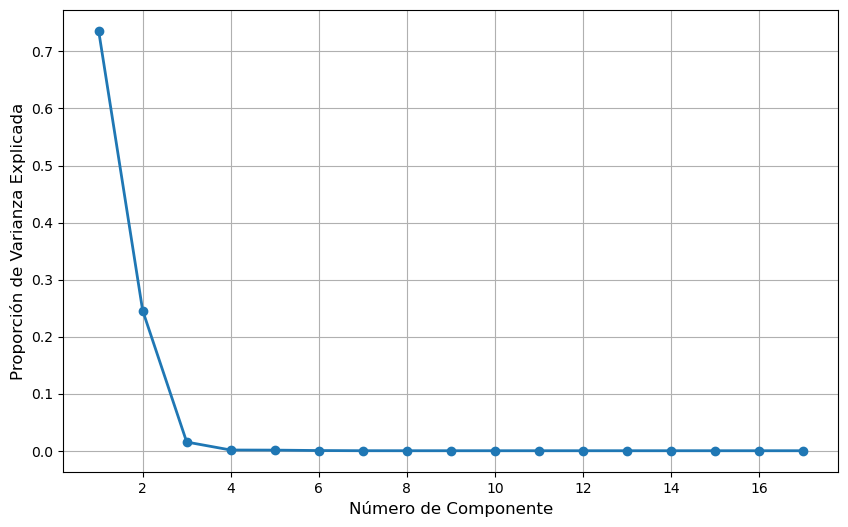

In [18]:
codo_plot(X_descartes, y, "descartes")

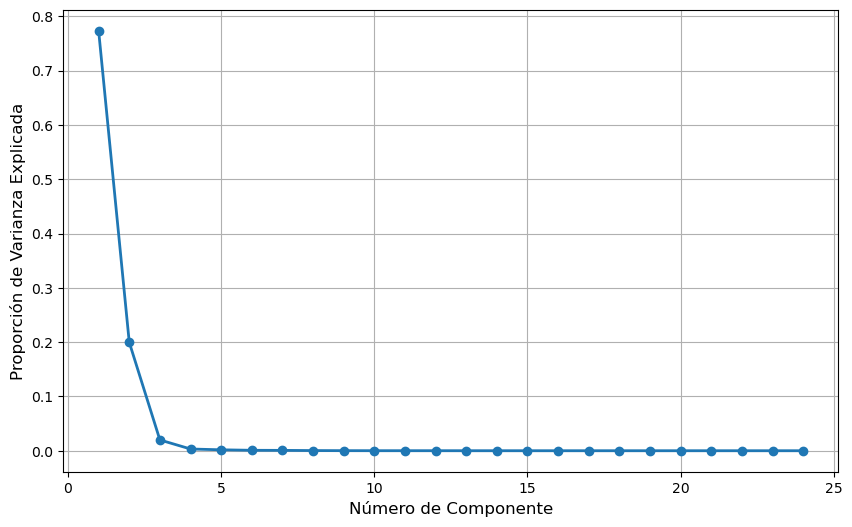

In [19]:
codo_plot(X_scaled, y, "total")

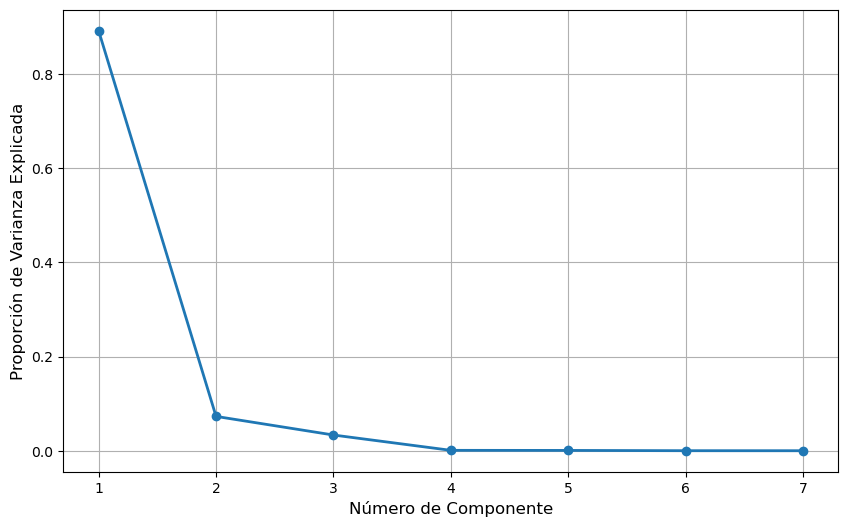

In [20]:
codo_plot(X_important, y, "importantes")

In [21]:
pca = PCA(n_components=3)
X_reduced_data = pca.fit_transform(X_descartes)
joblib.dump(pca, 'pca.pkl')
X_reduced = pd.DataFrame(
        X_reduced_data, 
        columns=[f'pca_{i+1}' for i in range(X_reduced_data.shape[1])],
        index=X_scaled.index  
    )
print(X_important.shape)
print(X_reduced.shape)
X_final = pd.concat([X_important, X_reduced], axis=1)
X_final.describe()

(61249, 7)
(61249, 3)


,sensor_14,sensor_11,sensor_16,sensor_4,sensor_17,sensor_3,sensor_9,pca_1,pca_2,pca_3
count,6.124900e+04,6.124900e+04,6.124900e+04,6.124900e+04,6.124900e+04,6.124900e+04,6.124900e+04,6.124900e+04,6.124900e+04,6.124900e+04
mean,-2.864027e-15,-1.583057e-15,7.760993e-17,1.374937e-15,1.450691e-16,-7.118449e-16,7.849160e-16,-3.707644e-16,-2.807415e-17,1.009277e-17
std,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,3.538073e+00,2.044034e+00,5.086515e-01
min,-2.591715e+00,-2.107169e+00,-6.942780e-01,-1.487475e+00,-1.645567e+00,-1.650485e+00,-1.603216e+00,-4.378414e+00,-4.267027e+00,-7.870899e-01
25%,-6.048584e-02,-3.436230e-01,-6.942780e-01,-6.907542e-01,-6.386649e-01,-6.343475e-01,-6.057236e-01,-2.752226e+00,-1.101192e+00,-2.258086e-01
50%,1.867423e-01,-1.678850e-01,-6.942780e-01,-5.446845e-01,-4.948217e-01,-4.729975e-01,-4.805621e-01,-1.814866e+00,5.103578e-01,-7.523366e-02
75%,7.066452e-01,7.231374e-01,1.440345e+00,8.439411e-01,7.278456e-01,7.490426e-01,7.496530e-01,3.051229e+00,1.910324e+00,5.246782e-02
max,2.262619e+00,1.691238e+00,1.440345e+00,2.001688e+00,1.842630e+00,1.837708e+00,1.994916e+00,6.340555e+00,2.056422e+00,1.207658e+00


In [22]:
X_final.to_csv("X_final.csv", index = False)

In [23]:
X_scaled.to_csv("X_scaled.csv", index = False)